# Main lab
-------------
this is where AnBev models are being cooked, a bit messy though

In [1]:
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from pathlib import Path

#### GDrive mount (on colab)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## generate data

In [3]:
import numpy as np
MAXSHAPE = 30
def fill40(arr: np.array):
    padded = np.zeros((MAXSHAPE, MAXSHAPE), dtype=arr.dtype)
    padded[:arr.shape[0], :arr.shape[1]] = arr[:, :MAXSHAPE]
    return padded

In [9]:
import glob, random, os
import pandas as pd
from IPython.display import clear_output
# file_list = glob.glob("/content/drive/MyDrive/centroset/set30.5/*.csv")
file_list = glob.glob("G:\My Drive\centroset\set30.5\*.csv")
# random.shuffle(file_list)
X = []
y = []
for csv in file_list:
    print(f"reading {csv}")
    # the X
    df = pd.read_csv(csv, index_col="Unnamed: 0")
    X.append(fill40(df.values))
    # the y
    if os.path.basename(csv).startswith("normal"):
        y.append([1, 0])
    else:
        y.append([0, 1])
clear_output()
print("done reading")
X = np.array(X)
y = np.array(y)

print(f"X has {len(X)} samples")
print(f"y has {len(y)} samples")

done reading
X has 152 samples
y has 152 samples


In [6]:
y = np.expand_dims(y, axis=1)

In [10]:
y

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1,

In [11]:
# y = y.reshape(-1, 1)
y.shape

(152, 2)

In [12]:
X_train,  X_val, y_train, y_val = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

In [13]:
y_train.shape

(121, 2)

In [14]:
X_train.shape

(121, 30, 30)

## Building the Model from Scratch

But before we continue, let's start defining the model:

Step 1 will be to import tensorflow.

In [15]:
import tensorflow as tf
import numpy as np
#from itertools import cycle

#from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import label_binarize
#from sklearn.multiclass import OneVsRestClassifier
#from scipy import interp
#from sklearn.metrics import roc_auc_score

Let's then add a Flatten layer that flattens the input image, which then feeds into the next layer, a Dense layer, or fully-connected layer, with 128 hidden units. Finally, because our goal is to perform binary classification, our final layer will be a sigmoid, so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is of class 1 (class 1 being grass and class 0 being dandelion).

In [95]:
model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(input_shape = (32, 32)),
                                    tf.keras.layers.InputLayer(input_shape=(1024,)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    # tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    # tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu, name="last_hidden"),
                                    # tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    # tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.sigmoid)])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])
model.summary()
# flatten the X
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

history = model.fit(X_train, X_train, epochs=100, validation_data=(X_val, X_val), verbose=1)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 512)               524800    
                                                                 
 dense_126 (Dense)           (None, 128)               65664     
                                                                 
 last_hidden (Dense)         (None, 32)                4128      
                                                                 
 dense_127 (Dense)           (None, 128)               4224      
                                                                 
 dense_128 (Dense)           (None, 512)               66048     
                                                                 
 dense_129 (Dense)           (None, 1024)              525312    
                                                                 
Total params: 1190176 (4.54 MB)
Trainable params: 119

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(30, 30, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
    ], name="Anbev_CNN")
model.summary()
model.compile(optimizer = tf.optimizers.Adam(learning_rate=5e-4),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x=X_train,
        y=y_train,
        steps_per_epoch=4,
        batch_size=26,
        epochs=100,
        verbose=1,
        validation_data=(X_val, y_val),
        shuffle=True
        )

Model: "Anbev_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0 

The "output shape" column shows the transformation of the dimensions of each layer as a result of the convolution and max pooling - convolution will reduce the layer size by a bit due to padding, and max pooling will halve the output size.

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss. We will use the `Adam` optimizer. [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) is a sensible optimization algorithm because it automates learning-rate tuning for us (alternatively, we could also use [RMSProp](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) or [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad) for similar results). We will add accuracy to `metrics` so that the model will monitor accuracy during training

### Training
Let's train for 15 epochs.

Note that steps_per_epoch was set along with batch_size in ImageDataGenerator so that steps_per_epoch * batch_size = total # of images. For example, for training, 8 * 120 = 960, just under our total of 999 images.

Notice that as we train, our validation accuracy never exceeds training accuracy, which is a good thing. Our model won't work better on unseen images than seen images.

In [32]:
X_train = X_train.reshape(-1, 30, 30, 1)
X_val = X_val.reshape(-1, 30, 30, 1)

In [ ]:
X_train = np.array(X).reshape(-1, 30, 30, 1)
y_train = np.array(y)

In [ ]:
# plo

## Accuracy, ROC Curve, and AUC

Let's evaluate the accuracy of our model:

In [17]:
model.evaluate(X_val, y_val, verbose=1)

1/1 [==============================] - 0s 32ms/step - loss: 0.7655 - accuracy: 0.8387


[0.7654948234558105, 0.8387096524238586]

Now, let's calculate our ROC curve and plot it.

First, let's make predictions on our validation set. When using generators to make predictions, we must first turn off shuffle (as we did when we created validation_generator) and reset the generator:

In [18]:
preds = model(X_val)

In [22]:
preds.numpy().argmax(axis=1)

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [25]:
y_val.argmax(axis=1)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [19]:
np.hstack(preds)

array([2.0645230e-01, 7.9354769e-01, 9.9919146e-01, 8.0849335e-04,
       9.9999976e-01, 2.4583500e-07, 7.1658707e-01, 2.8341296e-01,
       5.1030365e-04, 9.9948967e-01, 2.2787973e-01, 7.7212030e-01,
       9.9997675e-01, 2.3202650e-05, 7.9729706e-01, 2.0270298e-01,
       9.9998093e-01, 1.9080582e-05, 6.3314122e-01, 3.6685875e-01,
       1.3714257e-01, 8.6285746e-01, 9.9987662e-01, 1.2341001e-04,
       9.9999988e-01, 7.2835213e-08, 9.9999356e-01, 6.4247520e-06,
       9.9979299e-01, 2.0698358e-04, 4.4815324e-02, 9.5518470e-01,
       9.9964178e-01, 3.5819138e-04, 9.1340489e-08, 9.9999988e-01,
       4.4040219e-04, 9.9955958e-01, 1.0000000e+00, 2.2852008e-08,
       9.9996877e-01, 3.1173833e-05, 9.8299140e-01, 1.7008539e-02,
       1.0000000e+00, 4.8759712e-09, 9.9972206e-01, 2.7785951e-04,
       1.6330836e-03, 9.9836689e-01, 9.9951279e-01, 4.8721279e-04,
       9.9382138e-01, 6.1785411e-03, 9.9999976e-01, 2.5406231e-07,
       9.9996674e-01, 3.3274941e-05, 2.6397842e-05, 9.9997365e

In [20]:
np.hstack(preds).round(2)

array([0.42, 0.23, 0.35, 0.2 , 0.32, 0.39, 0.21, 0.29, 0.21, 0.17, 0.37,
       0.48, 0.22, 0.37, 0.2 , 0.23, 0.25, 0.23, 0.21, 0.22, 0.28, 0.29,
       0.21, 0.23, 0.24, 0.32, 0.25, 0.4 , 0.25, 0.18, 0.25],
      dtype=float32)

In [21]:
flatPreds = np.hstack(preds)
for a, b, c, d in zip(flatPreds.round(2), np.where(flatPreds < 0.5, 0, 1), flatPreds.round().astype(int), y_val):
    print(f"{a:.2f} {b} {c} {d}")

0.42 0 0 0
0.23 0 0 1
0.35 0 0 0
0.20 0 0 0
0.32 0 0 0
0.39 0 0 1
0.21 0 0 0
0.29 0 0 0
0.21 0 0 1
0.17 0 0 0
0.37 0 0 0
0.48 0 0 0
0.22 0 0 0
0.37 0 0 0
0.20 0 0 0
0.23 0 0 0
0.25 0 0 0
0.23 0 0 1
0.21 0 0 1
0.22 0 0 0
0.28 0 0 1
0.29 0 0 0
0.21 0 0 0
0.23 0 0 1
0.24 0 0 0
0.32 0 0 0
0.25 0 0 1
0.40 0 0 0
0.25 0 0 0
0.18 0 0 0
0.25 0 0 0


In [58]:
model.save("models/anbev-cnn-v2.keras")

In [ ]:
y_val

To create the ROC curve and AUC, we'll need to compute the false-positive rate and the true-positive rate:

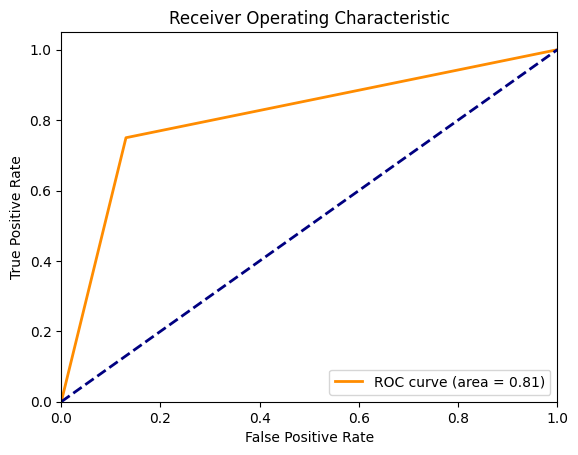

In [24]:
fpr, tpr, _ = roc_curve(y_val.argmax(axis=1), preds.numpy().argmax(axis=1))
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The ROC curve is a probability curve plotting the true-positive rate (TPR) against the false-positive rate (FPR). In this curve, the diagonal line is the curve for random guessing, e.g. coin flipping, so the ROC curve above shows that our model does better than chance at classifying between dandelions and grass. Not bad!

Similarly, the AUC (area under curve), as shown in the legend above, measures how much our model is capable of distinguishing between our two classes, dandelions and grass. The higher the AUC, the better our model is at classification. It is also used to compare different models, which I will do in future tutorials when I present how to build an image classifier using Convolutional Neural Networks and transfer learning with ResNet!

## Making Predictions

Now, let's use the model to make predictions! Upload an image to see if it's a dandelion or grass.

In [ ]:
for _ in range(15):
    i = random.randint(0, len(X)-1)
    pred = model.predict(np.array([X[i]]).reshape(1,30,30,1))
    pred = pred.round().astype(int)[0,0]
    print(f"index: {i} pred: {pred}, label: {y[i]}")

In [ ]:
#save model
model.save("/content/drive/MyDrive/anbev-cnn-fix.keras")

In [34]:
import glob, math, os
import pandas as pd

def visualize(setpath, shape, sampling, step, cmap="viridis", size=(15, 15), filter=None):
    dir = f"{setpath}/set{shape}.{sampling}/"
    assert os.path.isdir(dir), f"Directory {dir} dont exist"
    if step == "all":
        csv_files = glob.glob(f"{dir}/*.csv")
    elif filter:
        csv_files = glob.glob(f"{dir}/*{filter}*.csv")
    else:
        csv_files = glob.glob(f"{dir}/*s{step}*.csv")
    data_list = []
    for csv in csv_files:
        df = pd.read_csv(csv, index_col="Unnamed: 0")
        data_list.append(fill40(df.values))

    # Create a 4x4 grid to display the arrays
    num_rows, num_cols = [math.ceil(math.sqrt(len(csv_files)))]*2

    fig, axs = plt.subplots(num_rows, num_cols, figsize=size)

    # Iterate over the arrays and plot them in the grid
    for i in range(num_rows):
        for j in range(num_cols):
            # Calculate the index in the data_list based on the row and column
            index = i * num_cols + j
            if index < len(data_list):
                axs[i, j].imshow(data_list[index], cmap=cmap)
                axs[i, j].set_title(os.path.basename(csv_files[index]))
            axs[i, j].axis('off')

    # Adjust the spacing between the subplots
    #plt.subplots_adjust(wspace=0.05, hspace=0.3)
    fig.suptitle(f"Data for shape ({shape}) sample ({sampling}) step ({step})", fontsize=15)
    plt.tight_layout()
    # Show the grid of images
    plt.show()

TypeError: Image data of dtype object cannot be converted to float

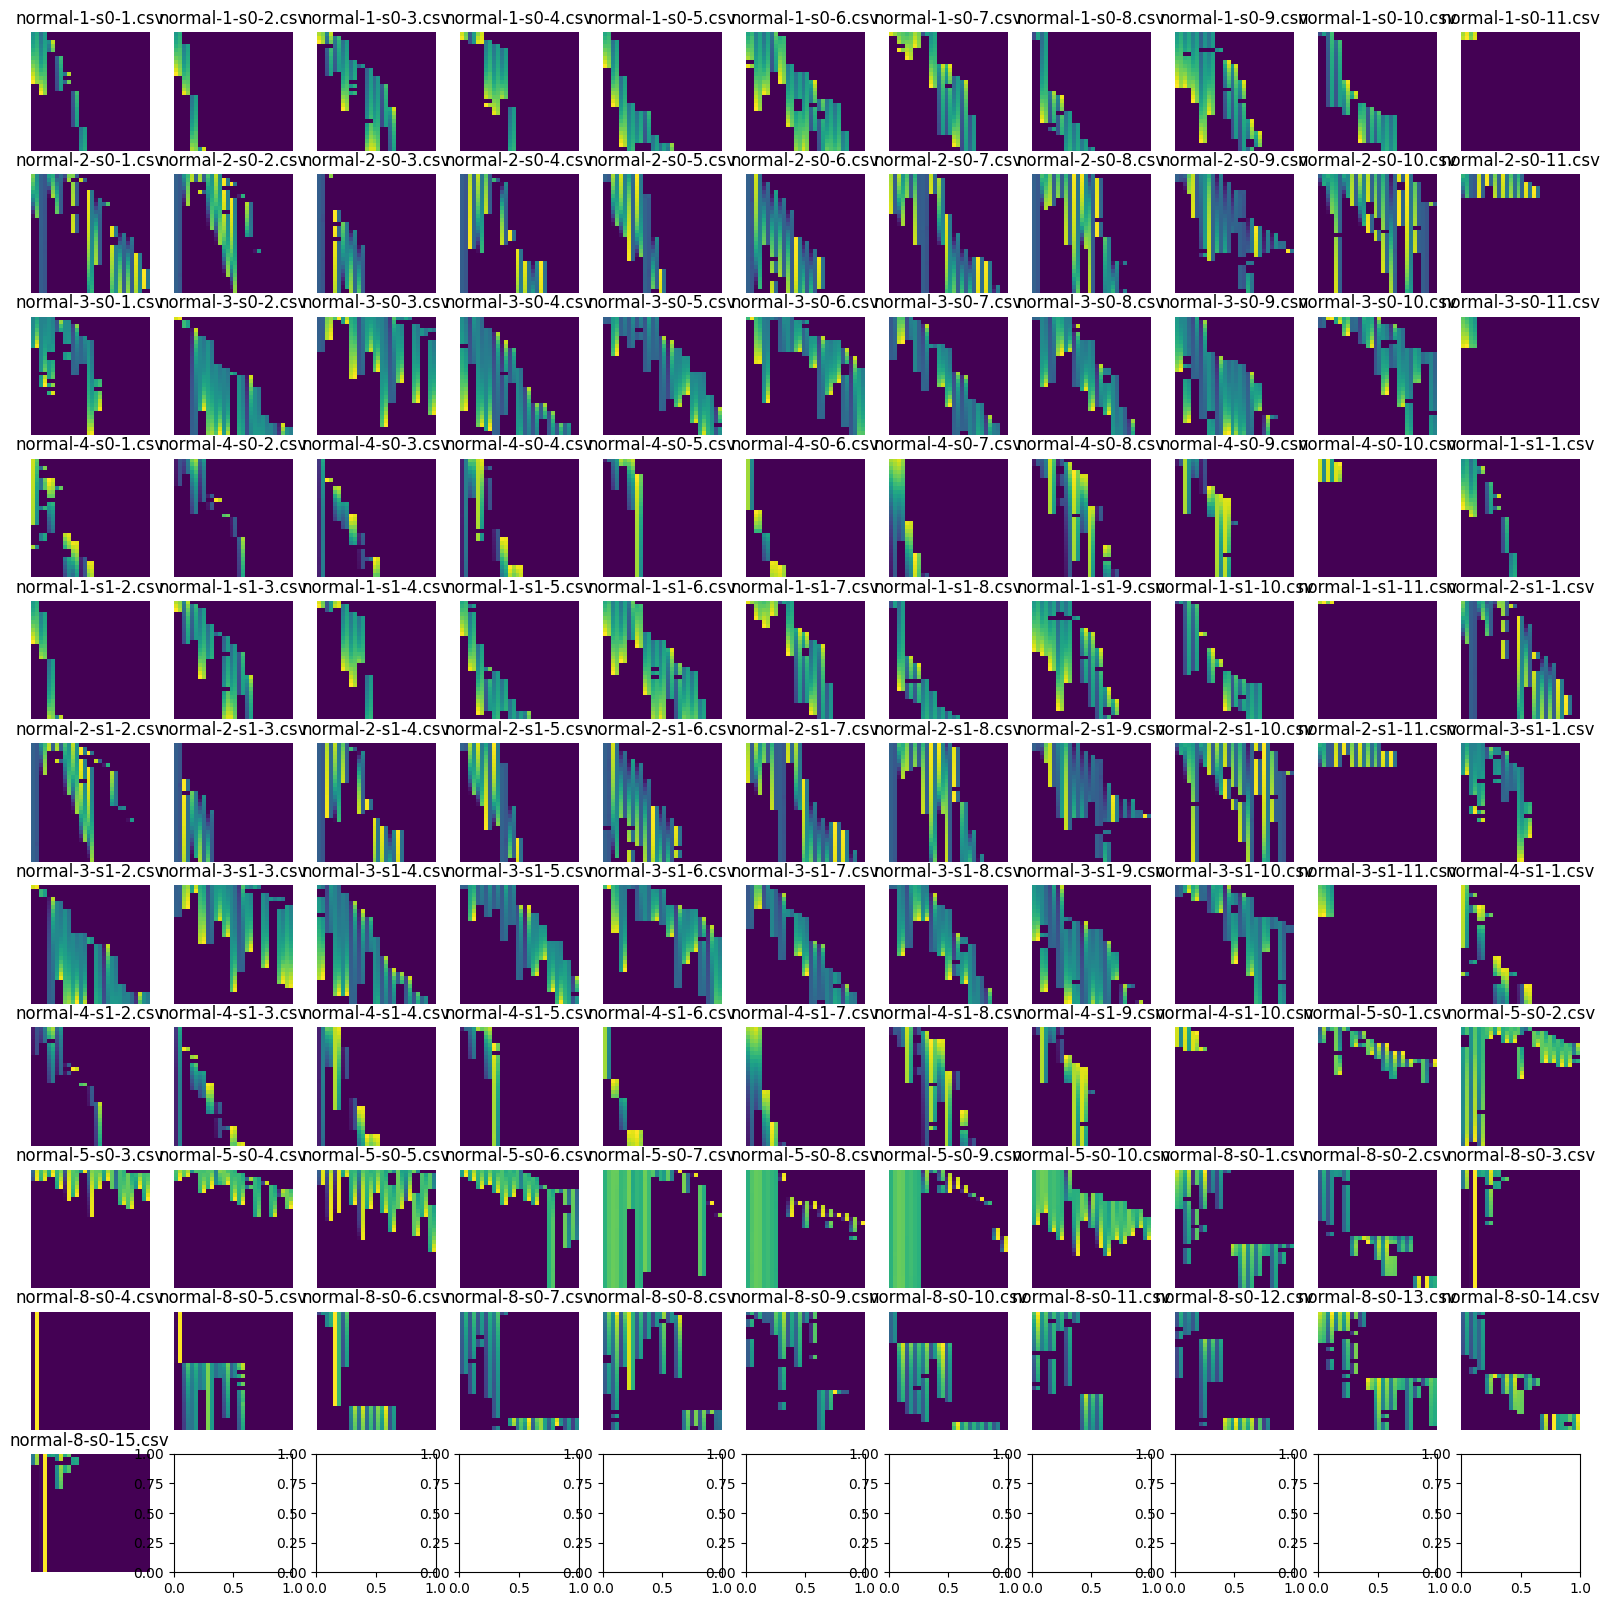

In [35]:
visualize("G:\My Drive\centroset", 30, 5, 0, cmap="viridis", size=(20, 20), filter="normal")

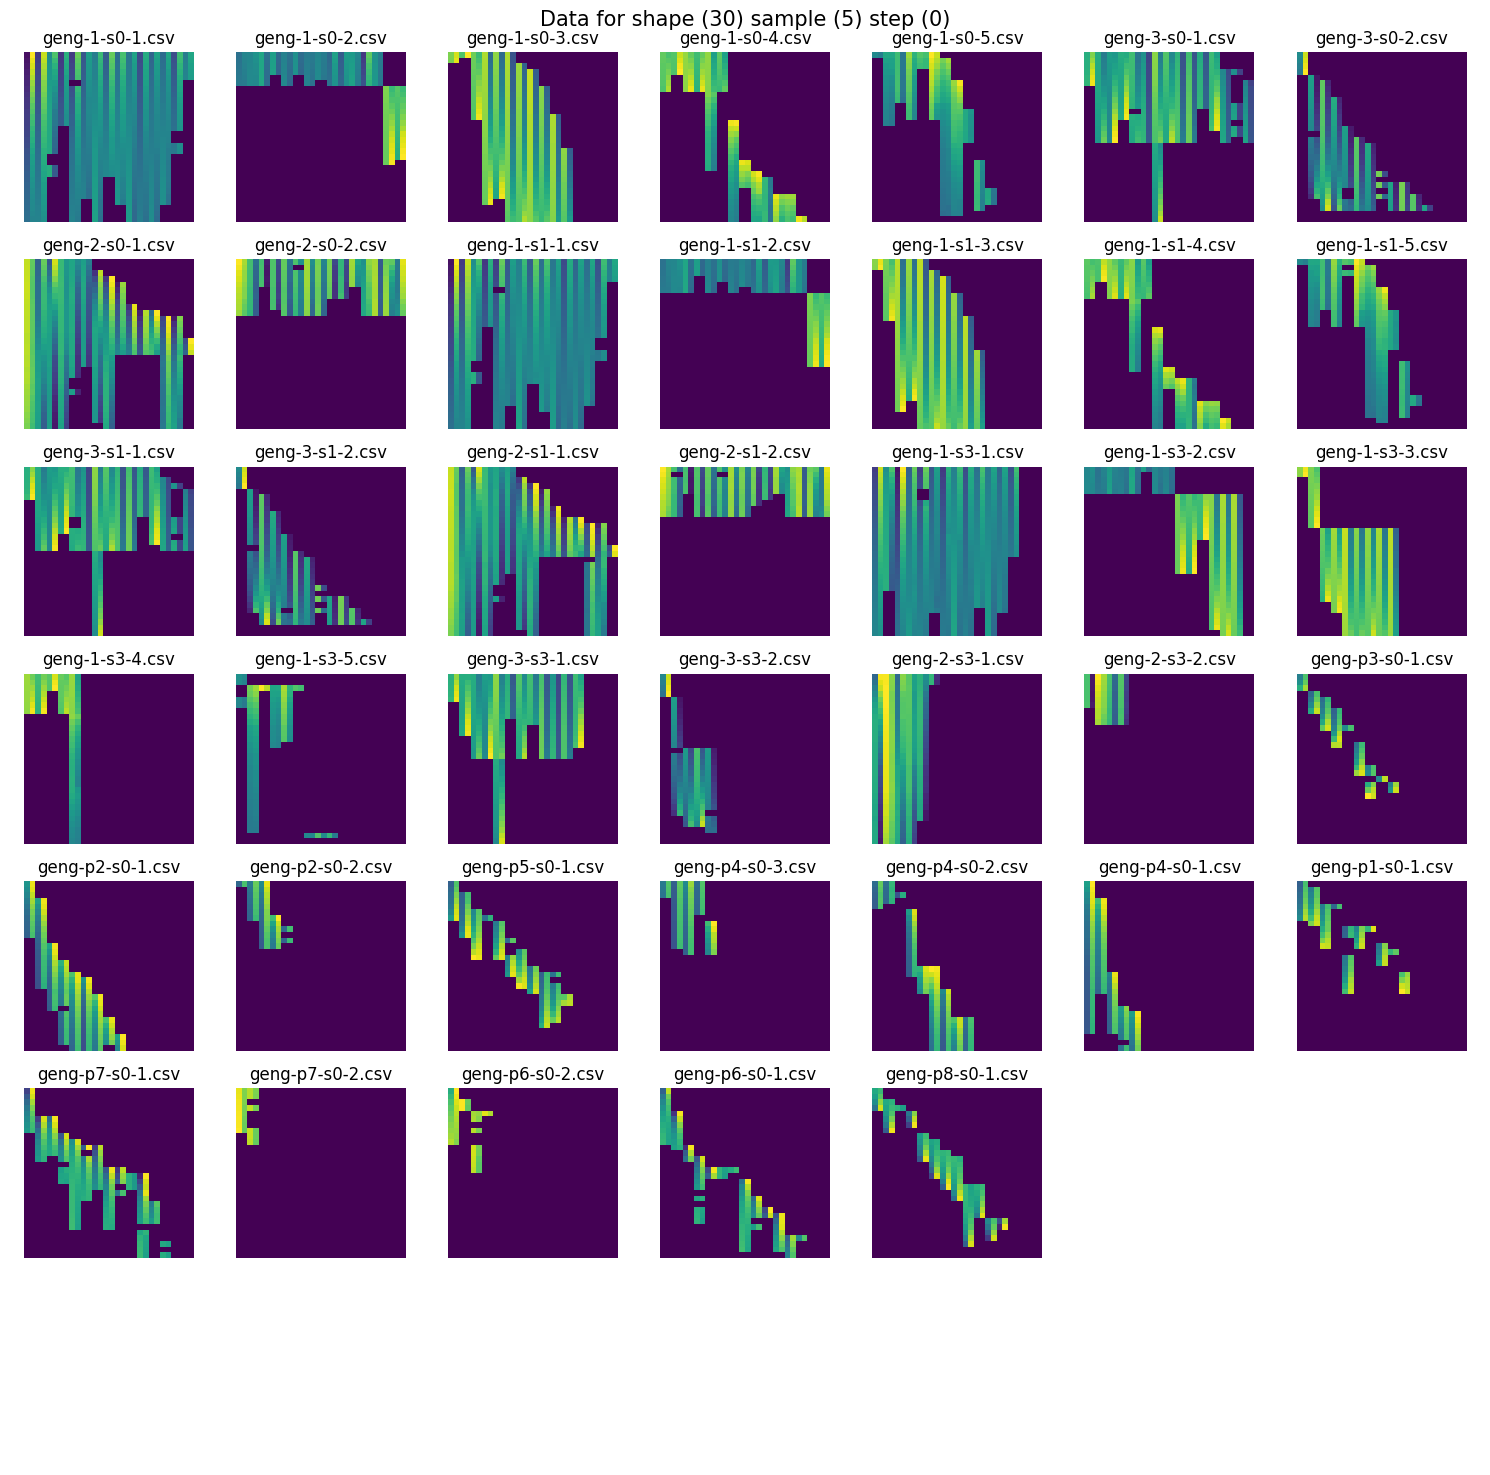

In [7]:
visualize("G:\My Drive\centroset", 30, 5, 0, cmap="viridis", size=(15, 15), filter="geng")

In [50]:
def visualizeArray(x, y, cmap="viridis", size=(15, 15)):

    # Create a 4x4 grid to display the arrays
    num_rows, num_cols = [math.ceil(math.sqrt(len(x)))]*2

    fig, axs = plt.subplots(num_rows, num_cols, figsize=size)

    # Iterate over the arrays and plot them in the grid
    for i in range(num_rows):
        for j in range(num_cols):
            # Calculate the index in the data_list based on the row and column
            index = i * num_cols + j
            if index < len(x):
                axs[i, j].imshow(x[index], cmap=cmap)
                axs[i, j].set_title(y[index])
            axs[i, j].axis('off')

    # Adjust the spacing between the subplots
    # plt.subplots_adjust(wspace=0.05, hspace=0.3)
    fig.suptitle(f"Array X Y", fontsize=15)
    plt.tight_layout()
    # Show the grid of images
    plt.show()

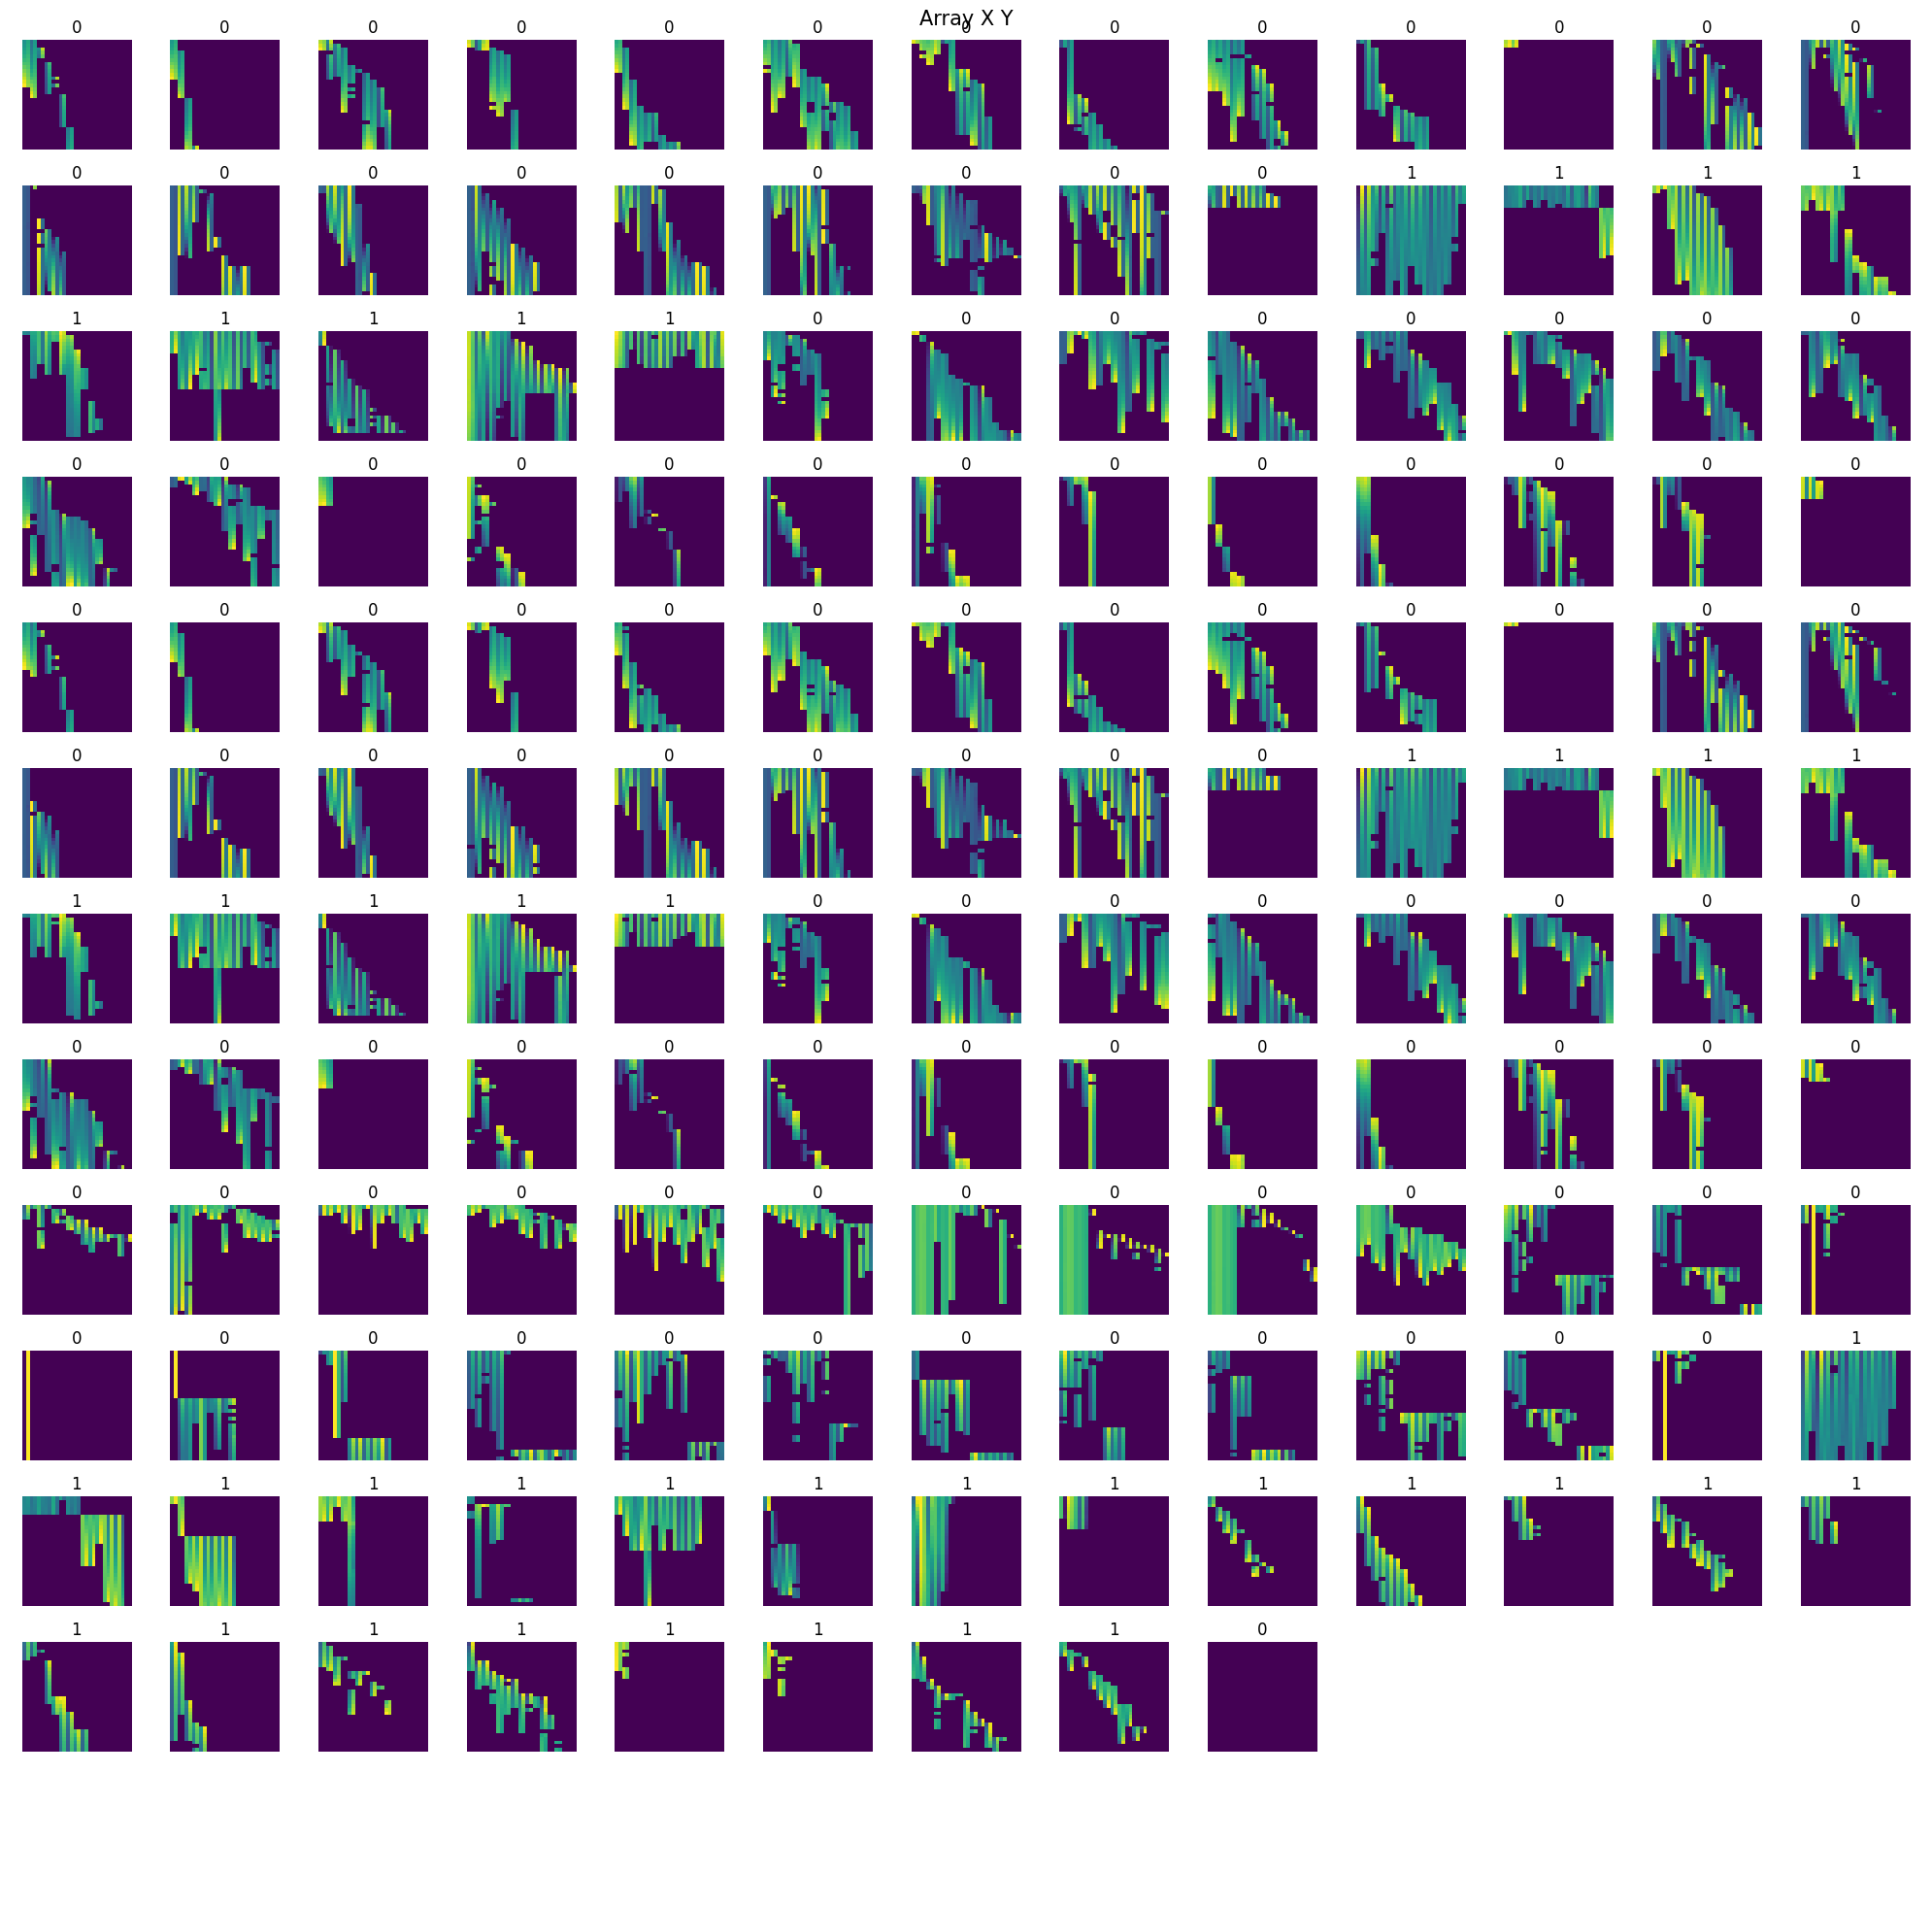

In [51]:
visualizeArray(X, y, size=(20, 20))

In [57]:
a,b,c,*_ = [1,2,3,4,5]
_

[4, 5]

# New CNN

In [53]:
# TODO: cari cara supaya tidak ada informasi yang hilang saat konvolusi/ pooling
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2, 1), strides=2, activation=tf.nn.relu, input_shape=(30, 30, 1)),
    # tf.keras.layers.MaxPooling2D((2, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
    # tf.keras.layers.MaxPooling2D((2, 3)),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.Conv2D(256, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.Conv2D(512, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.AveragePooling2D((2, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ], name="Anbev_CNN2")
model.summary()
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, steps_per_epoch=4, batch_size=26, epochs=50, verbose=1, validation_data=(X_val, y_val), shuffle=True)

Model: "Anbev_CNN2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 15, 15, 32)        96        
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 conv2d_20 (Conv2D)          (None, 9, 9, 256)         295168    
                                                                 
 conv2d_21 (Conv2D)          (None, 7, 7, 512)         1180160   
                                                                 
 average_pooling2d_1 (Avera  (None, 3, 2, 512)         0         
 gePooling2D)                                                    
                                                        

In [83]:
X_train.shape

(55, 32, 32)

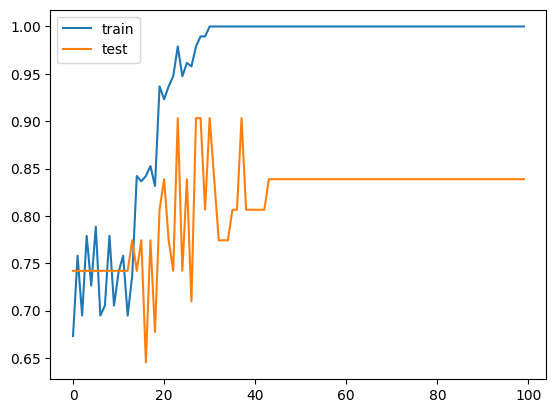

In [26]:
# plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()


# MobileNet Backbone


In [11]:
backbone = tf.keras.applications.ResNet50(input_shape=(32, 32, 1), include_top=False, weights=None)

model = tf.keras.models.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name="Anbev_MobileNet")

model.summary()
model.compile(optimizer = tf.optimizers.Adam(), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, steps_per_epoch=4, batch_size=26, epochs=50, verbose=1, validation_data=(X_val, y_val), shuffle=True)

Model: "Anbev_MobileNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23581440  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24631041 (93.96 MB)
Trainable params: 24577921 (93.76 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 43s 3s/step - loss: 3

KeyboardInterrupt: 

In [106]:
model = tf.keras.applications.ResNet50(input_shape=(32, 32, 1), classes=1, weights=None, classifier_activation="sigmoid")
# model.summary()
model.compile(optimizer = tf.optimizers.Adam(), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, steps_per_epoch=4, batch_size=26, epochs=50, verbose=1, validation_data=(X_val, y_val), shuffle=True)

Epoch 1/50
4/4 [==============================] - 23s 1s/step - loss: 2.0321 - accuracy: 0.4444 - val_loss: 0.5877 - val_accuracy: 0.8072
Epoch 2/50
4/4 [==============================] - 3s 807ms/step - loss: 1.0346 - accuracy: 0.7654 - val_loss: 0.5467 - val_accuracy: 0.8072
Epoch 3/50
4/4 [==============================] - 3s 835ms/step - loss: 0.7267 - accuracy: 0.7414 - val_loss: 0.5218 - val_accuracy: 0.8072
Epoch 4/50
4/4 [==============================] - 4s 848ms/step - loss: 0.5512 - accuracy: 0.8765 - val_loss: 0.5213 - val_accuracy: 0.8072
Epoch 5/50
4/4 [==============================] - 3s 769ms/step - loss: 1.3524 - accuracy: 0.7654 - val_loss: 0.5221 - val_accuracy: 0.8072
Epoch 6/50
4/4 [==============================] - 3s 797ms/step - loss: 1.5245 - accuracy: 0.7414 - val_loss: 0.5145 - val_accuracy: 0.8072
Epoch 7/50
4/4 [==============================] - 3s 742ms/step - loss: 0.8458 - accuracy: 0.8148 - val_loss: 0.5232 - val_accuracy: 0.8072
Epoch 8/50
4/4 [======

# LSTM


In [67]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(30, 30), return_sequences=False, dropout=0.5, recurrent_dropout=0.5),
    # tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(optimizer = tf.optimizers.Adam(), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(x=X_train, y=y_train, epochs=50, verbose=1, validation_data=(X_val, y_val))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 64)                24320     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 24385 (95.25 KB)
Trainable params: 24385 (95.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
4/4 [==============================] - 3s 118ms/step - loss: 0.6808 - accuracy: 0.5950 - val_loss: 0.6439 - val_accuracy: 0.7419
Epoch 2/50
4/4 [==============================] - 0s 27ms/step - loss: 0.6308 - accuracy: 0.7190 - val_loss: 0.6158 - val_accuracy: 0.7419
Epoch 3/50
4/4 [==============================] - 0s 27ms/step - loss: 0.5986 - accuracy: 0.7355 - val_loss: 0.6023 - val_accuracy: 0.

In [62]:
model(X_val[0].reshape(1, 30, 30))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.05573997]], dtype=float32)>

In [55]:
y_val.shape

(76, 1)

In [38]:
preds.shape

(31, 30, 1)

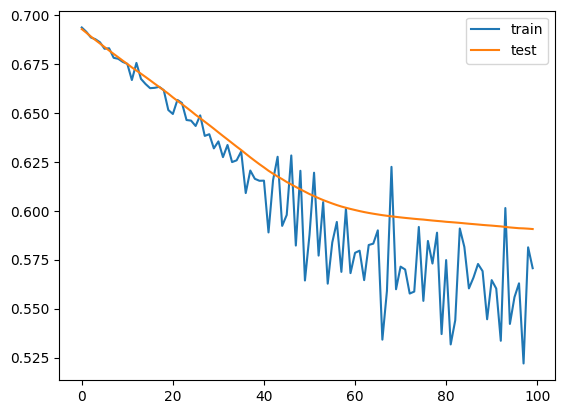

In [28]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# SVM

In [30]:
# flatten the X
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)


In [31]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=0.1, random_state=42)
clf.fit(X_train, y_train)

clf.score(X_val, y_val)

0.7631578947368421

In [23]:
clf.predict(X_val)

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0])

In [27]:
y_val

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0])

In [7]:
import numpy as np
w = np.array([
    [1,2,3],
    [4,5,6]
])
w[:, 1]

array([2, 5])

In [1]:
def split_list_with_ratio(lst, ratio):
    total_elements = len(lst)
    split_index = int(total_elements * ratio)
    first_half = lst[:split_index]
    second_half = lst[split_index:]
    return first_half, second_half

# Example usage:
my_list = [1, 2, 3, 4, 5, 6]
ratio = 0.5
first_half, second_half = split_list_with_ratio(my_list, ratio)
print("First half:", first_half)
print("Second half:", second_half)


First half: [1, 2, 3]
Second half: [4, 5, 6]


In [3]:
tresh_idx = int(len(my_list) * 0.5)
(my_list[:tresh_idx], my_list[tresh_idx:])

([1, 2, 3], [4, 5, 6])